# PYTHON IMPLEMENTATION FOR PARAMETER VALUES OF THE MEAN-REVERSION (CIR) TEMPERATURE MODEL 

In [26]:
import numpy as np
from scipy.linalg import lstsq
import pandas as pd

# Loadin My Data
Data = pd.read_excel('my_research_temp_data.xlsx')

# Differences Calculation and Normalization
t = Data['Annual Mean'][:-1]
dt = np.diff(Data['Annual Mean'])
dt = dt / np.sqrt(t)

# Calculation of Time Step
TimeStep = 1 / (len(Data['Annual Mean']) - 1)

# Construction of Regressors
regressors = np.column_stack([TimeStep / np.sqrt(t), TimeStep * np.sqrt(t)])

# Performing OLS Regression
drift = lstsq(regressors, dt)[0]  # OLS regressors coefficients estimates

# Computation of Residuals
res = regressors.dot(drift) - dt

# Calculation of Alpha, Tbar, and Beta
alpha = -drift[1]
Tbar = -drift[0] / drift[1]
beta = np.sqrt(np.var(res, axis=0) / TimeStep)

# Storing of  Initial Parameters In Array
InitialParams = np.array([alpha, Tbar, beta])
print('Initial Parameters [alpha, Tbar, beta]:', InitialParams)

Initial Parameters [alpha, Tbar, beta]: [39.77905439 27.32131275  0.64175196]


In [27]:
dt = np.diff(Data['Annual Mean'])

In [28]:
np.diff?

In [29]:
Data['Annual Mean']

0      27.04
1      27.10
2      27.21
3      27.22
4      26.94
       ...  
117    27.95
118    27.81
119    28.10
120    28.30
121    27.73
Name: Annual Mean, Length: 122, dtype: float64

# MONTE CARL SIMULATION 

In [30]:


def cir(T_0, alpha, Tbar, beta, T, N, M):
    dt = T/N
    temp = np.zeros((N,M))
    temp[0, :] = T_0
    for j in range(M):
        for i in range(1, N):
            dT = (
            alpha * (Tbar - temp[i - 1, j]) * dt
            + beta
            * np.sqrt(dt)
            * np.sqrt(np.maximum(temp[i - 1, j], 0))
            * np.random.normal()
            )
            temp[i, j] = temp[i - 1, j] + dT
    return temp

In [31]:
M = 100 # Number of paths for MC
N = 100 # Number of steps
T = 1
T_0 = Data['Annual Mean'][0]
alpha = 39.77905439
Tbar = 27.32131275
beta = 0.64175196
t = np.linspace(0, T, N)

In [32]:
temp=cir(T_0, alpha, Tbar, beta, T, N, M)

# SKETCH OF THE CIR PATHS FOR TEMPERATURE

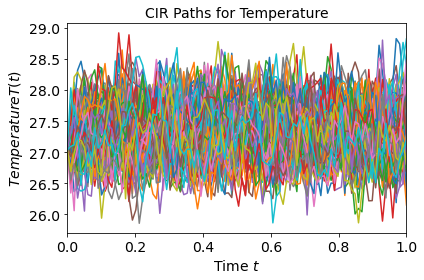

In [33]:
import matplotlib.pyplot as plt
import numpy as np
for j in range(M):
        plt.plot(t, temp[:, j])
plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("$Temperature T(t)$", fontsize=14)
plt.title("CIR Paths for Temperature", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()